In [111]:
from sklearn.tree import plot_tree
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, roc_auc_score, roc_curve, balanced_accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [15]:
df=pd.read_csv("neo.csv")

In [16]:
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [17]:
q = df['id'].value_counts()
w =q[q>1]
w

2469219     43
2277810     43
3743123     40
2138175     39
3893865     38
            ..
3844017      2
54054566     2
54244193     2
3716436      2
54192757     2
Name: id, Length: 15902, dtype: int64

In [18]:
df.drop(["orbiting_body","sentry_object", 'est_diameter_max'],axis=1,inplace=True)
df.head()

,id,name,est_diameter_min,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,13569.249224,5.483974e+07,16.73,False
1,2277475,277475 (2005 WK4),0.265800,73588.726663,6.143813e+07,20.00,True
2,2512244,512244 (2015 YE18),0.722030,114258.692129,4.979872e+07,17.83,False
3,3596030,(2012 BV13),0.096506,24764.303138,2.543497e+07,22.20,False
4,3667127,(2014 GE35),0.255009,42737.733765,4.627557e+07,20.09,True


/var/folders/j7/gf67sfkx7vd_rgkjfr1qm7tw0000gp/T/ipykernel_4698/1240462077.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/var/folders/j7/gf67sfkx7vd_rgkjfr1qm7tw0000gp/T/ipykernel_4698/1240462077.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/var/folders/j7/gf67sfkx7vd_

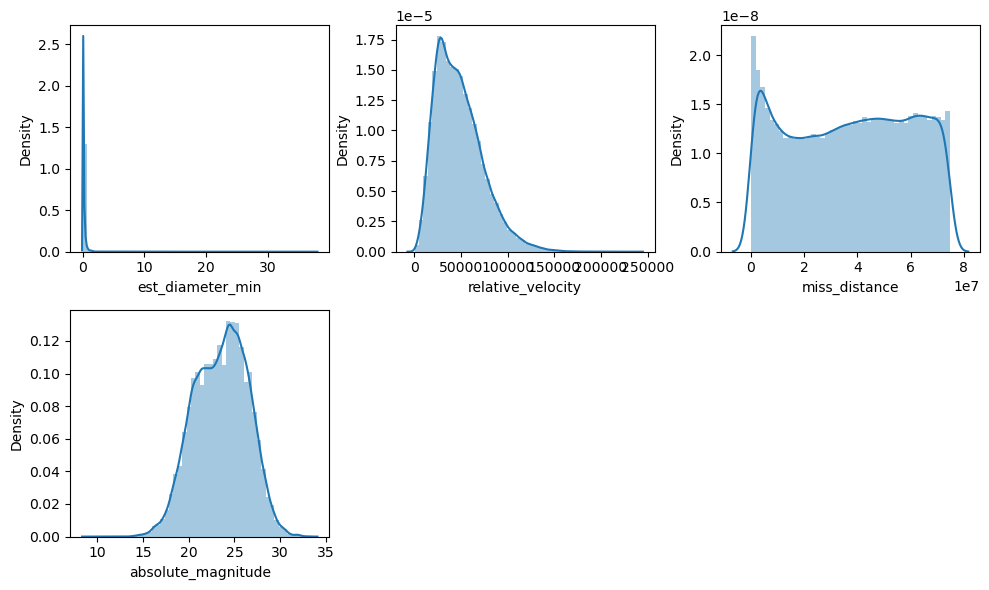

In [19]:
nums = ["est_diameter_min","relative_velocity","miss_distance","absolute_magnitude"]
rows=2
cols=3
counter=1
plt.rcParams['figure.figsize']=[10,6]
for i in nums:
    plt.subplot(rows,cols,counter)
    sns.distplot(df[i])
    counter+=1
plt.tight_layout()
plt.show()

In [22]:
df["hazardous"].value_counts()

False    81996
True      8840
Name: hazardous, dtype: int64

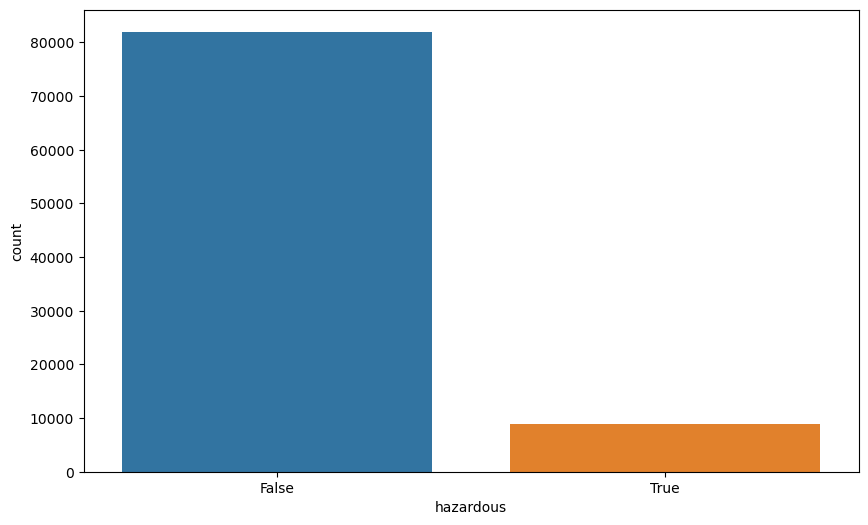

In [23]:
sns.countplot(x='hazardous',data=df)
plt.show()

In [25]:
df.columns

Index(['id', 'name', 'est_diameter_min', 'relative_velocity', 'miss_distance',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

In [39]:
y =df['hazardous']
y

0        False
1         True
2        False
3        False
4         True
         ...  
90831    False
90832    False
90833    False
90834    False
90835    False
Name: hazardous, Length: 90836, dtype: bool

In [40]:
corr_matrix=df.corr()
corr_matrix

/var/folders/j7/gf67sfkx7vd_rgkjfr1qm7tw0000gp/T/ipykernel_4698/363827394.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


,id,est_diameter_min,relative_velocity,miss_distance,absolute_magnitude,hazardous
id,1.000000,-0.148322,-0.059176,-0.056510,0.277258,-0.123443
est_diameter_min,-0.148322,1.000000,0.221553,0.142241,-0.560188,0.183363
relative_velocity,-0.059176,0.221553,1.000000,0.327169,-0.353863,0.191185
miss_distance,-0.056510,0.142241,0.327169,1.000000,-0.264168,0.042302
absolute_magnitude,0.277258,-0.560188,-0.353863,-0.264168,1.000000,-0.365267
hazardous,-0.123443,0.183363,0.191185,0.042302,-0.365267,1.000000


In [41]:
corr_hazardous = corr_matrix['hazardous']
np.abs(corr_hazardous).sort_values()

miss_distance         0.042302
id                    0.123443
est_diameter_min      0.183363
relative_velocity     0.191185
absolute_magnitude    0.365267
hazardous             1.000000
Name: hazardous, dtype: float64

/var/folders/j7/gf67sfkx7vd_rgkjfr1qm7tw0000gp/T/ipykernel_4698/2690646319.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap='YlGnBu', annot=True)


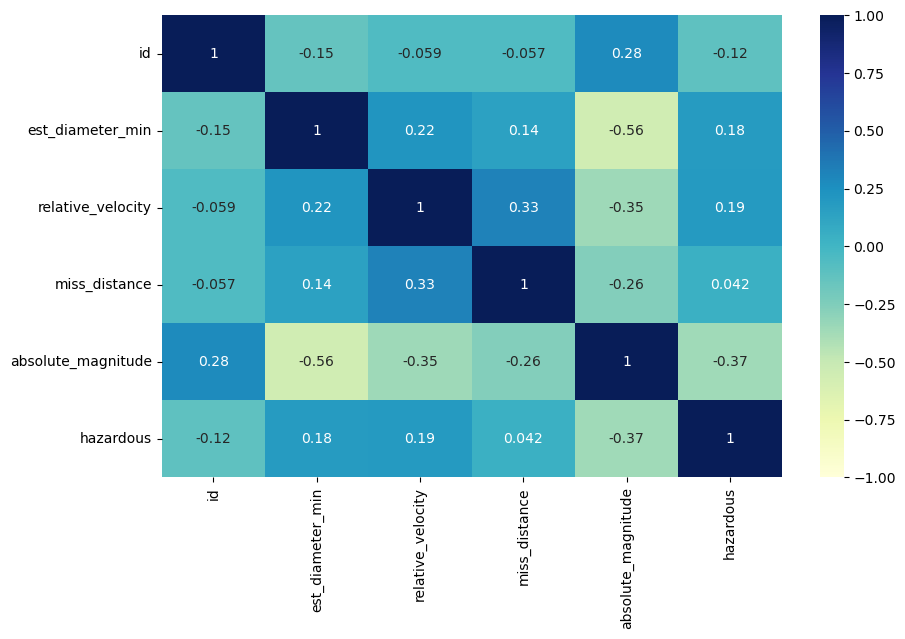

In [29]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap='YlGnBu', annot=True)
plt.show()

In [42]:
features = ['est_diameter_min',
       'relative_velocity', 'miss_distance',
       'absolute_magnitude']

X = df[features]
X

,est_diameter_min,relative_velocity,miss_distance,absolute_magnitude
0,1.198271,13569.249224,5.483974e+07,16.73
1,0.265800,73588.726663,6.143813e+07,20.00
2,0.722030,114258.692129,4.979872e+07,17.83
3,0.096506,24764.303138,2.543497e+07,22.20
4,0.255009,42737.733765,4.627557e+07,20.09
...,...,...,...,...
90831,0.026580,52078.886692,1.230039e+07,25.00
90832,0.016771,46114.605073,5.432121e+07,26.00
90833,0.031956,7566.807732,2.840077e+07,24.60
90834,0.007321,69199.154484,6.869206e+07,27.80


### ENCODING

In [43]:
label=LabelEncoder()
y=label.fit_transform(y)

### Dzielimy zbiór

In [44]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=123)

#### Nie dokonujemy standaryzacji dla drzew decyzyjnych 
sc=StandardScaler()
X_train_scaled=pd.DataFrame(sc.fit_transform(train_X))
X_test_scaled=pd.DataFrame(sc.transform(test_X))

### Tworzymy drzewo z przykładowymi parametrami 

In [45]:
dt= DecisionTreeClassifier(max_depth=30,min_samples_leaf=5, min_samples_split = 5, random_state=123,criterion = 'entropy' )
dt.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=5,
                       min_samples_split=5, random_state=123)

In [46]:
pred_train = dt.predict(train_X)
pred_test = dt.predict(test_X)

In [47]:
print(classification_report(train_y,pred_train))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     61525
           1       0.80      0.64      0.71      6602

    accuracy                           0.95     68127
   macro avg       0.88      0.81      0.84     68127
weighted avg       0.95      0.95      0.95     68127



In [49]:
print(classification_report(test_y,pred_test))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     20471
           1       0.48      0.37      0.42      2238

    accuracy                           0.90     22709
   macro avg       0.71      0.66      0.68     22709
weighted avg       0.89      0.90      0.89     22709



<Axes: title={'center': 'Variable Importance for Decision Tree'}>

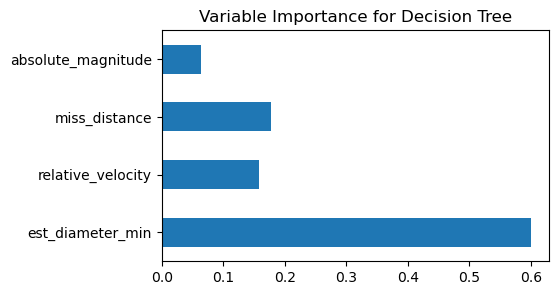

In [50]:
feat_importances = pd.Series(dt.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh', title='Variable Importance for Decision Tree',figsize=[5,3])

In [51]:
y_pred_proba = dt.predict_proba(test_X)[:,1]
y_pred_proba 

array([0., 0., 0., ..., 0., 0., 0.])

In [52]:
auc = roc_auc_score(test_y, y_pred_proba)
print (auc)

0.8175919124283533


In [53]:
fpr, tpr,_ = roc_curve(test_y, y_pred_proba)

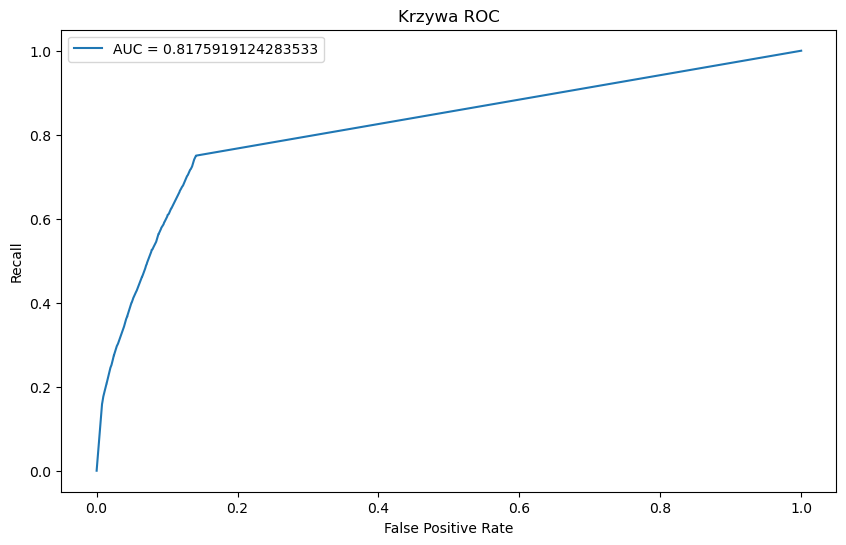

In [54]:
plt.plot(fpr, tpr, label="AUC = " + str(auc))
plt.title('Krzywa ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.legend()
plt.show()

### Próba z crosvalidation

In [62]:
clf = DecisionTreeClassifier(random_state=123)

sk_folds = StratifiedKFold(n_splits = 5)


scores = cross_val_score(clf, X, y, cv = sk_folds, scoring = 'f1')


print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))



Cross Validation Scores:  [0.39487179 0.44002123 0.43498818 0.45189003 0.46218741]
Average CV Score:  0.43679172923454523
Number of CV Scores used in Average:  5


In [86]:
clf = DecisionTreeClassifier(random_state=123)

sk_folds = StratifiedKFold(n_splits = 5)

scoring = ['f1', 'accuracy', 'recall', 'precision']

for i in scoring:
    scores = cross_val_score(clf, X, y, cv = sk_folds, scoring = i)
    print (f' {i}: \n {scores}')
    print("Average CV Score: ", round (scores.mean(),3))



 f1: 
 [0.39487179 0.44002123 0.43498818 0.45189003 0.46218741]
Average CV Score:  0.437
 accuracy: 
 [0.87010128 0.88385534 0.89475422 0.89464413 0.90174492]
Average CV Score:  0.889
 recall: 
 [0.43552036 0.4688914  0.41628959 0.44626697 0.43382353]
Average CV Score:  0.44
 precision: 
 [0.36116323 0.4145     0.45544554 0.45765661 0.49451966]
Average CV Score:  0.437


### OVERSAMPLING ze SMOTE

In [99]:
from imblearn.over_sampling import SMOTE


In [100]:
smote = SMOTE (random_state=123)
 
train_X_smote, train_y_smote = smote.fit_resample(train_X, train_y)

<Axes: >

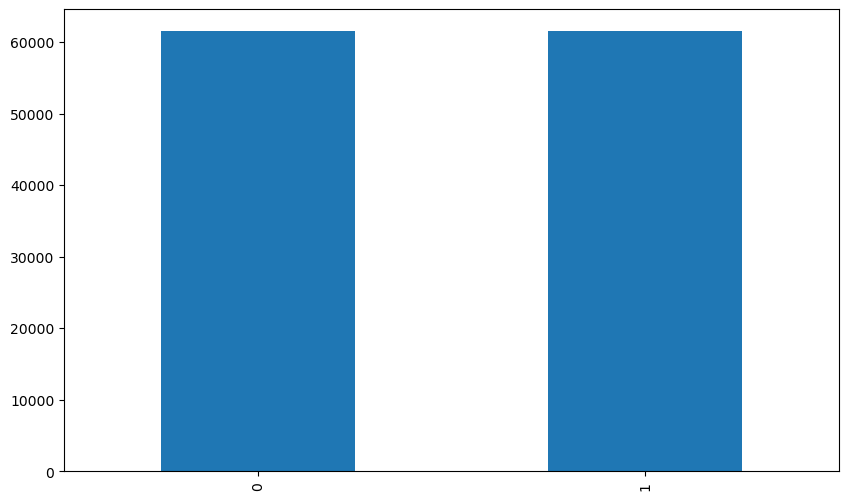

In [101]:
	
pd.Series(train_y_smote).value_counts().plot.bar()

In [107]:
from sklearn.model_selection import GridSearchCV

param_grid= [                           
              {
                'max_depth': range(1, 40, 2),
                'min_samples_leaf' : range(3, 50),
                'criterion' : ["gini", "entropy"]
                }
              ]

print(param_grid)

model_smote = DecisionTreeClassifier()
  
grid_smote = GridSearchCV(estimator=model_smote
                                 , param_grid=param_grid, scoring="f1")
 
grid_smote.fit(X=train_X_smote, y=train_y_smote)
 
best_parameters_smote = grid_smote.best_params_  
print(best_parameters_smote) 



[{'max_depth': range(1, 40, 2), 'min_samples_leaf': range(3, 50), 'criterion': ['gini', 'entropy']}]
{'criterion': 'gini', 'max_depth': 39, 'min_samples_leaf': 14}


In [108]:
model_smote = DecisionTreeClassifier(**best_parameters_smote)
model_smote.fit(train_X_smote, train_y_smote)

DecisionTreeClassifier(max_depth=39, min_samples_leaf=14)

In [109]:
y_pred_smote = model_smote.predict(train_X_smote)
print(classification_report(train_y_smote, y_pred_smote))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     61525
           1       0.95      0.94      0.95     61525

    accuracy                           0.95    123050
   macro avg       0.95      0.95      0.95    123050
weighted avg       0.95      0.95      0.95    123050



In [112]:
y_pred_smote2 = model_smote.predict(test_X)
print(classification_report(test_y, y_pred_smote2))
print('Accuracy Score: ', accuracy_score(test_y, y_pred_smote2))
print('Balanced_accuracy Score: ', balanced_accuracy_score(test_y, y_pred_smote2))
print('Confusion Matrix: \n', confusion_matrix(test_y, y_pred_smote2))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     20471
           1       0.46      0.50      0.48      2238

    accuracy                           0.89     22709
   macro avg       0.70      0.72      0.71     22709
weighted avg       0.90      0.89      0.89     22709

Accuracy Score:  0.892949931745123
Balanced_accuracy Score:  0.7163627558486473
Confusion Matrix: 
 [[19167  1304]
 [ 1127  1111]]


In [114]:
print(classification_report(test_y, pred_test))
print('Accuracy Score: ', accuracy_score(test_y, pred_test))
print('Balanced_accuracy Score: ', balanced_accuracy_score(test_y, pred_test))
print('Confusion Matrix: \n', confusion_matrix(test_y, pred_test))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     20471
           1       0.48      0.37      0.42      2238

    accuracy                           0.90     22709
   macro avg       0.71      0.66      0.68     22709
weighted avg       0.89      0.90      0.89     22709

Accuracy Score:  0.8984103218988067
Balanced_accuracy Score:  0.6630775531147639
Confusion Matrix: 
 [[19574   897]
 [ 1410   828]]
